Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix


loading dataset

In [8]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()


# normalize pixel values (0-255 -> 0-1)
# This helps the neural network train faster and better
x_train, x_test = x_train/255.0, x_test/255.0

1. model architecture

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())


model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))



In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

2. Training

In [11]:

history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.4247 - loss: 1.5676 - val_accuracy: 0.5286 - val_loss: 1.3118
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.5743 - loss: 1.1929 - val_accuracy: 0.5977 - val_loss: 1.1485
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6356 - loss: 1.0364 - val_accuracy: 0.6540 - val_loss: 0.9868
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6803 - loss: 0.9142 - val_accuracy: 0.6789 - val_loss: 0.9307
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7116 - loss: 0.8226 - val_accuracy: 0.6899 - val_loss: 0.8932
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7376 - loss: 0.7440 - val_accuracy: 0.6946 - val_loss: 0.8848
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7664 - loss: 0.6687 - val_accuracy: 0.7183 - val_loss: 0.8474
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7864 - loss: 0.6083 - v

3. Visualizing Model accuracu and model loss

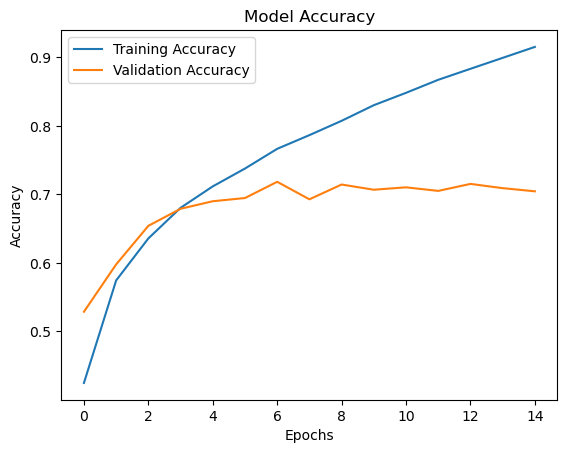

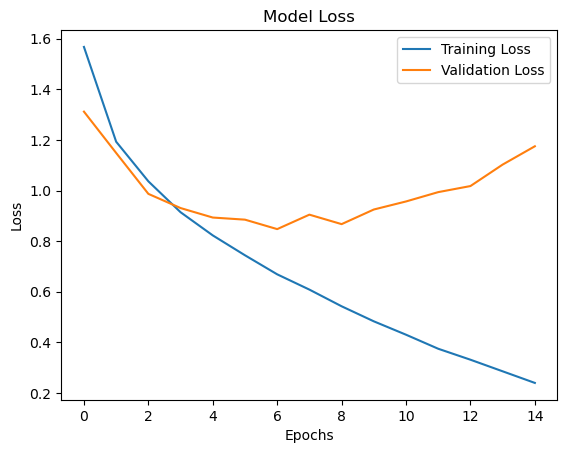

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4. Evaluation

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7012 - loss: 1.1936
Test Accuracy: 0.701200008392334


training accuracy is continuously increasing from 43% → 91%.
This means CNN is learning patterns very well from the training data.

Validation accuracy increases till around 69–70%, then starts to fluctuate.
This pattern shows that the model learns well initially but struggles to generalize after some epochs.

so, this is a sign of overfitting.
The model remembers the training images but does not generalize perfectly to new unseen images.

## Adding Dropouts
This will help to Reduce overfitting , improve validation accuracy.

1. Model architecture

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.3))


model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.4))

# fully connected layers


model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))


In [15]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

2. Train the model

In [16]:
history = model.fit(
    x_train, y_train,
    epochs=20,                 # More epochs are now safe because dropout reduces overfitting
    batch_size=64,
    validation_split=0.2
)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.3316 - loss: 1.7896 - val_accuracy: 0.4967 - val_loss: 1.4216
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4827 - loss: 1.4351 - val_accuracy: 0.5549 - val_loss: 1.2757
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5332 - loss: 1.3103 - val_accuracy: 0.6038 - val_loss: 1.1233
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5651 - loss: 1.2278 - val_accuracy: 0.6048 - val_loss: 1.0970
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.5886 - loss: 1.1678 - val_accuracy: 0.6487 - val_loss: 1.0093
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6077 - loss: 1.1160 - val_accuracy: 0.6464 - val_loss: 1.0088
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6239 - loss: 1.0762 - val_accuracy: 0.6643 - val_loss: 0.9410
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6359 - loss: 1.0376 - 

3. Visualization

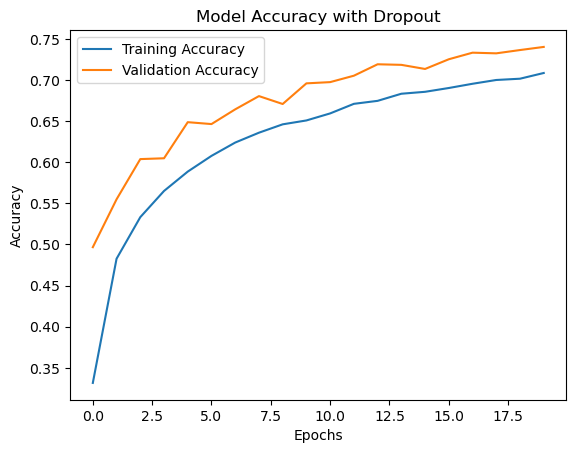

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Dropout')
plt.legend()
plt.show()

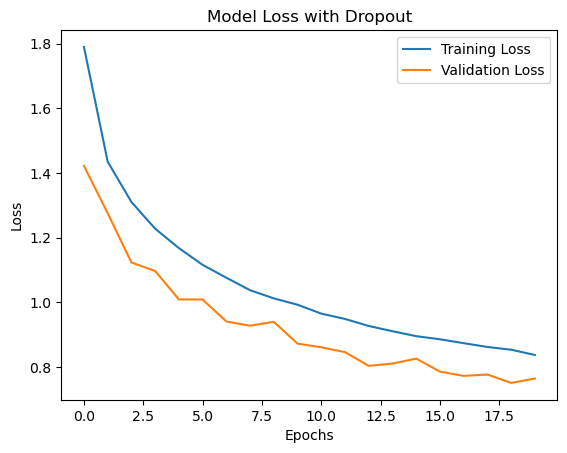

In [19]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss with Dropout')
plt.legend()
plt.show()

In [27]:
import matplotlib.pyplot as plt

Visualize Correctly Classified Images

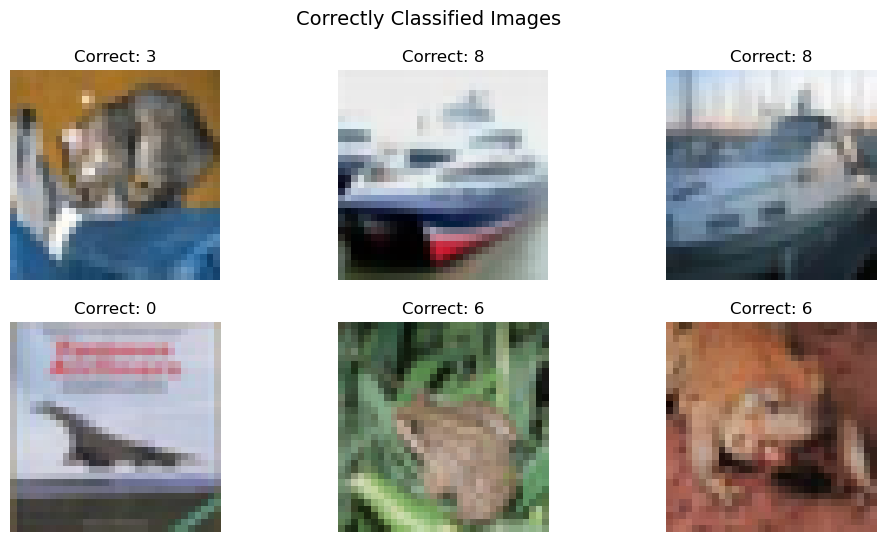

In [ ]:

correct_indices = np.where(y_pred_classes == y_true)[0]

plt.figure(figsize=(12, 6))
for i, idx in enumerate(correct_indices[:6]):   # show first 6 correct
    plt.subplot(2, 3, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Correct: {y_true[idx]}")
    plt.axis('off')

plt.suptitle("Correctly Classified Images", fontsize=14)
plt.show()


Visualize Incorrectly Classified Images

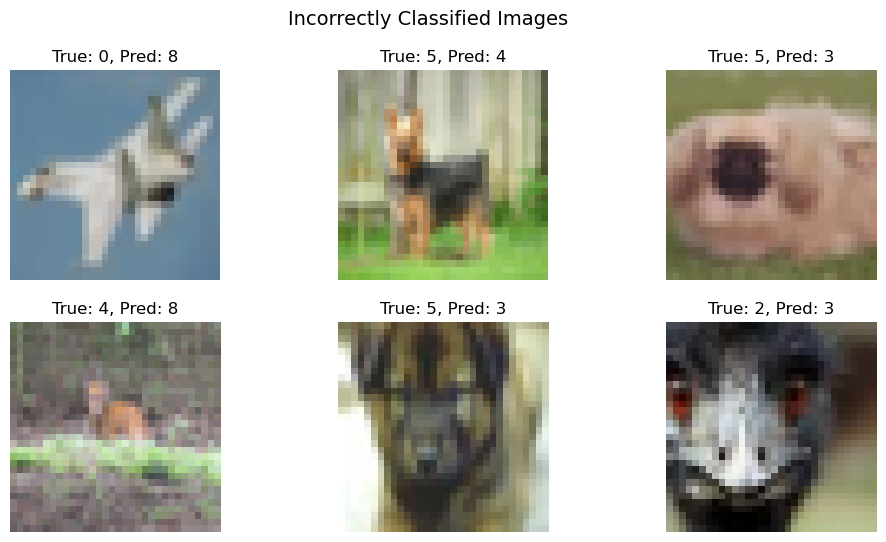

In [26]:
incorrect_indices = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(12, 6))
for i, idx in enumerate(incorrect_indices[:6]):  # show first 6 incorrect
    plt.subplot(2, 3, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')

plt.suptitle("Incorrectly Classified Images", fontsize=14)
plt.show()


5. Model Evaluation

In [20]:

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7261 - loss: 0.7908
Test Accuracy: 0.7261000275611877
Test Loss: 0.790790319442749


In [21]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.reshape(-1)

print(classification_report(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.72      0.79      0.76      1000
           1       0.83      0.87      0.85      1000
           2       0.67      0.59      0.63      1000
           3       0.52      0.58      0.55      1000
           4       0.70      0.64      0.67      1000
           5       0.67      0.60      0.63      1000
           6       0.85      0.74      0.79      1000
           7       0.73      0.79      0.76      1000
           8       0.74      0.89      0.81      1000
           9       0.86      0.77      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [22]:
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

[[792  14  19   9   9   6   5   9 117  20]
 [ 16 874   4   7   2   2   6   2  42  45]
 [ 92   5 591  83  84  48  38  30  18  11]
 [ 36   6  64 581  52 135  35  48  29  14]
 [ 28   5  62  72 637  26  30 115  21   4]
 [ 21   3  49 199  34 596   9  67  17   5]
 [ 11   7  60  83  47  22 740  12  16   2]
 [ 25   3  29  40  37  53   1 789  10  13]
 [ 43  22   2  18   3   0   2   2 893  15]
 [ 34 110   7  15   3   6   4  11  42 768]]
